In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from scipy.stats import bernoulli
import pingouin
import sqlite3
# Mostra todas as colunas
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings("ignore")

# Preparação e carga de dados em banco para manipulação de informações

In [2]:
#  função que recebe o caminho com arquivo csv, 
#  o nome do banco de dados e o nome da tabela e escreve o conteúdo do csv no banco de dados, na tabela indicada.
#  criação do banco PremierLeague com as tabelas Resultados do jogos, 
#  alguns .csv muito grandes necessidade de chunk para carregamento da tabela no BD

def create_db_tab(file, name_db, name_tab):

    # Cria/faz conexão com o banco
    db = sqlite3.connect(name_db + '.db')   
    
    # Carrega o arquivo indicado em chunks (lotes) de forma a permitir operação com dataframes grandes demais

    chunksize = 5000
       
    for df_chunk in pd.read_csv(file, low_memory=False, chunksize=chunksize, delimiter=",", encoding='latin-1'):
        df_chunks = []
        df_chunks.append(df_chunk)

        # Para cada lote ("pedaço") do dataframe
        for df in df_chunks:
            # Escreve o pedaço no banco
            df.to_sql(
                name=name_tab, # Define o nome da tabela a receber as informações (ou ser criada)
                index=False, # Não escreve o índice do dataframe na tabela
                if_exists='append', # Se a tabela já existir, adiciona as informações abaixo das existentes
                con=db # Define em qual banco os dados serão inseridos
            )

In [8]:
# import da PremierLeague de tabs com os resultados dos jogos e suas respectivas estatísticas por temporada
create_db_tab('season-19931994_csv.csv', 'PremierLeague', 'Results_1994')
create_db_tab('season-19941995_csv.csv', 'PremierLeague', 'Results_1995')
create_db_tab('season-19951996_csv.csv', 'PremierLeague', 'Results_1996')
create_db_tab('season-19961997_csv.csv', 'PremierLeague', 'Results_1997')
create_db_tab('season-19971998_csv.csv', 'PremierLeague', 'Results_1998')
create_db_tab('season-19981999_csv.csv', 'PremierLeague', 'Results_1999')
create_db_tab('season-19992000_csv.csv', 'PremierLeague', 'Results_2000')
create_db_tab('season-20002001_csv.csv', 'PremierLeague', 'Results_2001')
create_db_tab('season-20012002_csv.csv', 'PremierLeague', 'Results_2002')
create_db_tab('season-20022003_csv.csv', 'PremierLeague', 'Results_2003')
create_db_tab('season-20032004_csv.csv', 'PremierLeague', 'Results_2004')
create_db_tab('season-20042005_csv.csv', 'PremierLeague', 'Results_2005')
create_db_tab('season-20052006_csv.csv', 'PremierLeague', 'Results_2006')
create_db_tab('season-20062007_csv.csv', 'PremierLeague', 'Results_2007')
create_db_tab('season-20072008_csv.csv', 'PremierLeague', 'Results_2008')
create_db_tab('season-20082009_csv.csv', 'PremierLeague', 'Results_2009')
create_db_tab('season-20092010_csv.csv', 'PremierLeague', 'Results_2010')
create_db_tab('season-20102011_csv.csv', 'PremierLeague', 'Results_2011')
create_db_tab('season-20112012_csv.csv', 'PremierLeague', 'Results_2012')
create_db_tab('season-20122013_csv.csv', 'PremierLeague', 'Results_2013')
create_db_tab('season-20132014_csv.csv', 'PremierLeague', 'Results_2014')
create_db_tab('season-20142015_csv.csv', 'PremierLeague', 'Results_2015')
create_db_tab('season-20152016_csv.csv', 'PremierLeague', 'Results_2016')
create_db_tab('season-20162017_csv.csv', 'PremierLeague', 'Results_2017')
create_db_tab('season-20172018_csv.csv', 'PremierLeague', 'Results_2018')
create_db_tab('season-20182019_csv.csv', 'PremierLeague', 'Results_2019')

In [6]:
# Create table with all results for machine learning evaluation
# this tables contains the mobile mean measures and the ratio possible payments for winnings
create_db_tab('PremierLeague_Allresults.csv', 'PremierLeague', 'All_Results')

In [8]:
# Create table with all results for machine learning evaluation
# this table contains the mobile mean measures and the ratio possible payments for winnings
# this table include the season information
create_db_tab('PremierLeague_Allresults_Season_2nd.csv', 'PremierLeague', 'All_Results_Season_2nd')

In [2]:
# conexão com o BD Premier League
db_PremierLeague = sqlite3.connect('PremierLeague.db')

In [3]:
query01 = """
        SELECT *   
        FROM Results_2005 
            """
df_query01 = pd.read_sql_query(query01, db_PremierLeague)
df_query01.head(3)

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,B365H,B365D,B365A,BWH,BWD,BWA,GBH,GBD,GBA,IWH,IWD,IWA,LBH,LBD,LBA,SBH,SBD,SBA,WHH,WHD,WHA,GB>2.5,GB<2.5,B365>2.5,B365<2.5,GBAHH,GBAHA,GBAH,LBAHH,LBAHA,LBAH,B365AHH,B365AHA,B365AH
0,E0,14/08/04,Aston Villa,Southampton,2,0,H,2,0,H,U Rennie,14,6,5,2,14,9,12,6,0,0,0,0,1.90,3.1,4.33,1.9,3.25,4.0,2.00,3.25,3.50,1.85,3.1,3.6,1.73,3.20,4.33,1.91,3.25,3.75,1.80,3.10,4,1.91,1.79,2.05,1.75,1.70,2.05,-0.25,2.02,1.82,-0.50,2.00,1.90,-0.50
1,E0,14/08/04,Blackburn,West Brom,1,1,D,0,1,A,C Foy,12,4,4,2,15,17,4,5,1,0,0,0,1.80,3.1,5.00,1.8,3.25,4.5,1.77,3.30,4.75,1.80,3.1,3.8,1.67,3.25,4.50,1.73,3.40,4.33,1.90,2.87,4,1.85,1.85,2.00,1.80,1.77,1.95,-0.50,1.80,2.04,-0.50,1.85,2.05,-0.50
2,E0,14/08/04,Bolton,Charlton,4,1,H,2,0,H,P Dowd,21,9,11,5,10,12,9,5,1,1,0,0,2.25,3.2,3.10,2.1,3.20,3.3,2.25,3.20,3.10,2.20,3.0,2.9,2.20,3.00,3.00,2.25,3.20,2.88,2.15,3.20,2.9,1.86,1.85,2.00,1.80,2.00,1.85,-0.25,2.04,1.80,-0.25,2.00,1.90,-0.25


> time que tem o melhor índice de aproveitamento gol/chute ganha mais?
-- montar uma query com total de HST e AST do time e o seu número de vitórias


In [4]:
df_query01_wins = df_query01[['HomeTeam','AwayTeam','FTHG','FTAG','HST','AST','FTR']].\
loc[ (df_query01['FTR']=='H') | (df_query01['FTR']=='A')]

In [5]:

cond1 = df_query01_wins['FTR'] == 'H'
cond2 = df_query01_wins['HST'] > df_query01_wins['AST']
cond3 = df_query01_wins['FTR'] == 'A'
cond4 = df_query01_wins['HST'] < df_query01_wins['AST']

df_query01_wins['shot_more'] = False
df_query01_wins['shot_more'].loc[ cond1 & cond2 ] = True
df_query01_wins['shot_more'].loc[ cond3 & cond4 ] = True

# df_all['Is_Married'].loc[df_all['Title'] == 'Mrs'] = 1 # índice alto de sobrevivência
# df_query01_wins['shot_more'] = [x for x in chutou_mais(df_query01_wins['FTR'], df_query01_wins['HST'], df_query01_wins['AST'])]


In [6]:
df_query01_wins.sample(3), df_query01_wins.shape 

(        HomeTeam    AwayTeam  FTHG  FTAG  HST  AST FTR  shot_more
 377  Southampton  Man United     1     2    3    8   A       True
 347   Birmingham   Blackburn     2     1    6    1   H       True
 8        Chelsea  Man United     1     0    5    3   H       True,
 (270, 8))

In [7]:
df_query01_wins.groupby('shot_more').agg({'shot_more': ['count']})

,shot_more
,count
shot_more,
False,86
True,184


> 68% dos times que ganharam, chutaram mais vezes pro gol 

# Time que chuta mais vezes ao gol conquista mais pontos?

In [9]:
query02 = """

        SELECT HomeTeam as Team, 
               FTR, 
               count(FTR) as Qtd_per_Result, 
               sum(HST) as Qtd_Shots,
               round(avg(HST),2) as Mean_Shots,
               "Home" as Field, 
               CASE 
                 WHEN FTR = 'A' THEN 'Lost'
                 WHEN FTR = 'H' THEN 'Win'
                 ELSE 'Draw'
                 END AS Result
        From Results_2005
        GROUP BY Team, FTR
        UNION
        SELECT AwayTeam as Team, 
               FTR, count(FTR) as Qtd_per_Result, 
               sum(AST) as Qtd_Shots,
               round(avg(AST),2) as Mean_Shots,
               "Away" as Field, 
               CASE 
                 WHEN FTR = 'A' THEN 'Win'
                 WHEN FTR = 'H' THEN 'Lost'
                 ELSE 'Draw'
               END AS Result
        From Results_2005
        GROUP BY Team, FTR
        ORDER BY Team, Result, Field

""" 

df_query02_wins_shots = pd.read_sql_query(query02, db_PremierLeague)

df_query02_wins_shots.shape

(118, 7)

In [10]:
# resultados e qtd de chutes por time
df_query02_wins_shots.sort_values(by=['Qtd_Shots']).groupby(['Team', 'Result'])\
.agg({'Qtd_per_Result': ['sum'], 'Qtd_Shots': ['sum']})

Qtd_per_Result Qtd_Shots
                                 sum       sum
Team           Result                         
Arsenal        Draw                8        62
               Lost                5        30
               Win                25       207
Aston Villa    Draw               11        63
               Lost               15        69
               Win                12        75
Birmingham     Draw               12        63
               Lost               15        67
               Win                11        49
Blackburn      Draw               15        96
               Lost               14        52
               Win                 9        62
Bolton         Draw               10        82
               Lost               12        62
               Win                16       110
Charlton       Draw               10        37
               Lost               16        67
               Win                12        69
Chelsea        Draw                8        64
               Lost                1         3
               Win                29       237
Crystal Palace Draw               12        63
               Lost               19        83
               Win                 7        36
Everton        Draw                7        30
               Lost               13        45
               Win                18       110
Fulham         Draw                8        28
               Lost               18        76
               Win                12        79
Liverpool      Draw                7        46
               Lost               14        64
               Win                17       131
Man City       Draw               13        63
               Lost               12        55
               Win                13        92
Man United     Draw               11       109
               Lost                5        40
               Win                22       185
Middlesbrough  Draw               13       100
               Lost               11        49
               Win                14       110
Newcastle      Draw               14        86
               Lost               14        95
               Win                10        74
Norwich        Draw               12        69
               Lost               19        72
               Win                 7        42
Portsmouth     Draw                9        41
               Lost               19        75
               Win                10        75
Southampton    Draw               14        77
               Lost               18        73
               Win                 6        39
Tottenham      Draw               10        65
               Lost               14        72
               Win                14       112
West Brom      Draw               16        58
               Lost               16        87
               Win                 6        38

In [11]:
# número de vitórias e chutes em ordem descrecente por melhores chutadores ao gol
# filto vencedores + agrupamento Team + soma vitórias dentro fora casa + ordem descendente de vitórias
df_wins_shots = df_query02_wins_shots.loc[df_query02_wins_shots['Result']=='Win'].\
groupby(['Team']).\
agg({'Qtd_per_Result': ['sum'], 'Qtd_Shots': ['sum']}).\
sort_values([('Qtd_per_Result', 'sum')],ascending=False)

In [12]:
df_wins_shots

,Qtd_per_Result,Qtd_Shots
,sum,sum
Team,,
Chelsea,29,237
Arsenal,25,207
Man United,22,185
Everton,18,110
Liverpool,17,131
Bolton,16,110
Middlesbrough,14,110
Tottenham,14,112


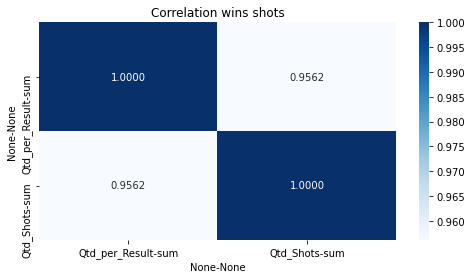

In [13]:
# comparação entre duas variáveis quantitativas considerando somente vitórias - Spearman (devido a diferença de chutes)
plt.figure(figsize=(8, 4))
sns.heatmap(df_wins_shots[['Qtd_per_Result','Qtd_Shots']].corr(method = 'spearman'),
            annot = True,
            fmt = '.4f',
            cmap='Blues')
plt.title('Correlation wins shots')
plt.show()

In [14]:
# pontos dos times
df_results = df_query02_wins_shots
df_results['Points'] = 0
df_results['Points'].loc[df_results['Result']=='Draw'] = (1 * df_results['Qtd_per_Result'])
df_results['Points'].loc[df_results['Result']=='Lost'] = (0 * df_results['Qtd_per_Result'])
df_results['Points'].loc[df_results['Result']=='Win'] = (3 * df_results['Qtd_per_Result'])

In [15]:
df_query02_wins_shots

,Team,FTR,Qtd_per_Result,Qtd_Shots,Mean_Shots,Field,Result,Points
0,Arsenal,D,3,29,9.67,Away,Draw,3
1,Arsenal,D,5,33,6.60,Home,Draw,5
2,Arsenal,H,4,20,5.00,Away,Lost,0
3,Arsenal,A,1,10,10.00,Home,Lost,0
4,Arsenal,A,12,87,7.25,Away,Win,36
...,...,...,...,...,...,...,...,...
113,West Brom,D,8,33,4.13,Home,Draw,8
114,West Brom,H,10,62,6.20,Away,Lost,0
115,West Brom,A,6,25,4.17,Home,Lost,0
116,West Brom,A,1,9,9.00,Away,Win,3


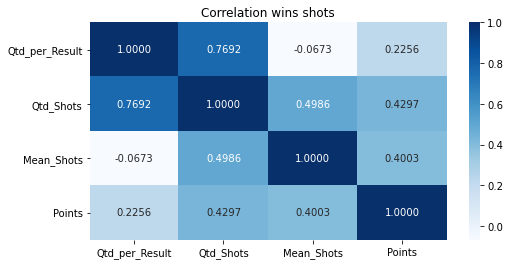

In [16]:
# comparação entre duas variáveis quantitativas, como a há outliers - Spearman
# considerando todos os resultados e pontuação
plt.figure(figsize=(8, 4))
sns.heatmap(df_query02_wins_shots.corr(method = 'spearman'),
            annot = True,
            fmt = '.4f',
            cmap='Blues')
plt.title('Correlation wins shots')
plt.show()

In [54]:
# média chutes e total de chutes e pontuação
df_points_shots_means = df_query02_wins_shots.\
groupby(['Team']).\
agg({'Points': ['sum'], 'Qtd_Shots': ['sum'], 'Mean_Shots': ['mean']}).\
sort_values([('Points', 'sum')],ascending=False)

In [55]:
# média chutes e total de chutes e pontuação
df_points_shots_means

,Points,Qtd_Shots,Mean_Shots
,sum,sum,mean
Team,,,
Chelsea,95,304,7.014000
Arsenal,83,299,7.958333
Man United,77,334,8.821667
Everton,61,185,4.996667
Liverpool,58,241,6.548333
Bolton,58,254,6.740000
Middlesbrough,55,259,6.675000
Man City,52,210,5.536667


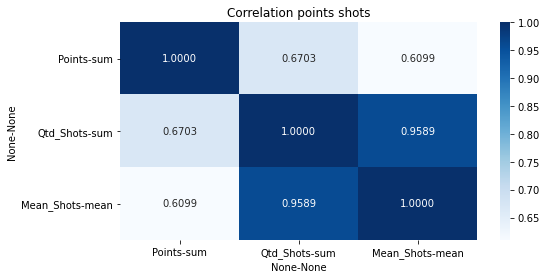

In [56]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_points_shots_means.corr(method = 'spearman'),
            annot = True,
            fmt = '.4f',
            cmap='Blues')
plt.title('Correlation points shots')
plt.show()

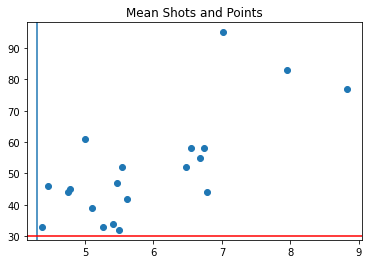

In [57]:
plt.scatter(df_points_shots_means['Mean_Shots'], df_points_shots_means['Points'])
plt.title('Mean Shots and Points')
plt.axvline(4.3)
plt.axhline(30, color='red')
plt.show()

In [58]:
print(stats.spearmanr(df_points_shots_means[('Mean_Shots', 'mean')], df_points_shots_means[('Points', 'sum')]))
print(stats.kendalltau( df_points_shots_means[('Mean_Shots', 'mean')], df_points_shots_means[('Points', 'sum')]))
print(stats.pearsonr(df_points_shots_means[('Mean_Shots', 'mean')], df_points_shots_means[('Points', 'sum')]))

SpearmanrResult(correlation=0.6099404507421212, pvalue=0.004295868891455033)
KendalltauResult(correlation=0.45747269610911473, pvalue=0.00517232044681168)
(0.7309223812941237, 0.0002514458957980639)


obs.: 
Valor de pvalue ≤ α (0.05): a correlação é estatisticamente significativa
Valor de pvalue > α (0.05): a correlação não é estatisticamente significativa

> Conclusão: a média de chutes e o total de chutes a gol tem relação com os pontos ganhos do time

# Time que sofre menos chutes ao gol perde menos?

In [36]:
query03 = """

SELECT HomeTeam as Team, 
       FTR, 
       count(FTR) as Qtd_per_Result, 
       sum(AST) as Qtd_Shots_Suffered, 
       round(avg(AST),2) as Mean_Shots_Suffered, 
       "Home" as Local,
       CASE 
          WHEN FTR = 'A' THEN 'Lost'
          WHEN FTR = 'H' THEN 'Win'
          ELSE 'Draw'
       END AS Result
From Results_2005
GROUP by Team, FTR
UNION
SELECT AwayTeam as Team, 
       FTR, 
       count(FTR) as Qtd_per_Result, 
       sum(HST) as Qtd_Shots_Suffered, 
       round(avg(AST),2) as Mean_Shots_Suffered, 
       "Away" as Local, 
       CASE 
         WHEN FTR = 'A' THEN 'Win'
         WHEN FTR = 'H' THEN 'Lost'
         ELSE 'Draw'
       END AS Result
From Results_2005
GROUP by Team, FTR
order by Team, Result, Local

"""

df_losts_shots = pd.read_sql_query(query03, db_PremierLeague)
df_losts_shots

,Team,FTR,Qtd_per_Result,Qtd_Shots_Suffered,Mean_Shots_Suffered,Local,Result
0,Arsenal,D,3,7,9.67,Away,Draw
1,Arsenal,D,5,20,4.00,Home,Draw
2,Arsenal,H,4,19,5.00,Away,Lost
3,Arsenal,A,1,9,9.00,Home,Lost
4,Arsenal,A,12,57,7.25,Away,Win
...,...,...,...,...,...,...,...
113,West Brom,D,8,43,5.38,Home,Draw
114,West Brom,H,10,78,6.20,Away,Lost
115,West Brom,A,6,40,6.67,Home,Lost
116,West Brom,A,1,5,9.00,Away,Win


In [37]:
# número de derrotas/empates e chutes em ordem descrecente por defensores 
# filto derrotas/empates + agrupamento Team + soma derrotas/empates dentro fora casa + ordem crescente de derrotas/empates
df_lostdraw_shots_suffer = df_losts_shots.loc[(df_losts_shots['Result']=='Lost') | (df_losts_shots['Result']=='Draw')].\
groupby(['Team']).\
agg({'Qtd_per_Result': ['sum'], 'Qtd_Shots_Suffered': ['sum']}).\
sort_values([('Qtd_per_Result', 'sum')],ascending=False)

In [38]:
df_lostdraw_shots_suffer['Index_Shot_Suffered'] = df_lostdraw_shots_suffer[('Qtd_Shots_Suffered', 'sum')] / df_lostdraw_shots_suffer[('Qtd_per_Result', 'sum')]
df_lostdraw_shots_suffer.dtypes

Qtd_per_Result       sum      int64
Qtd_Shots_Suffered   sum      int64
Index_Shot_Suffered         float64
dtype: object

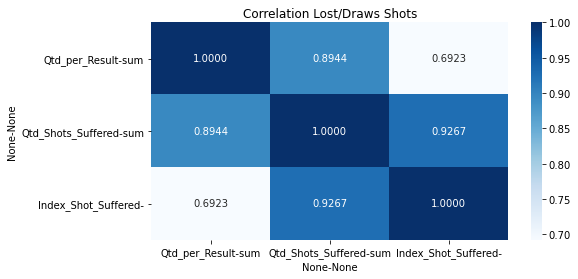

In [39]:
# comparação entre duas variáveis quantitativas considerando somente vitórias - Spearman (devido a diferença de chutes)
plt.figure(figsize=(8, 4))
sns.heatmap(df_lostdraw_shots_suffer.corr(method = 'spearman'),
            annot = True,
            fmt = '.4f',
            cmap='Blues')
plt.title('Correlation Lost/Draws Shots')
plt.show()

In [40]:
# pontos perdidos dos times
df_losts_shots['Lost_Points'] = 0
df_losts_shots['Lost_Points'].loc[df_losts_shots['Result']=='Draw'] = (2 * df_losts_shots['Qtd_per_Result'])
df_losts_shots['Lost_Points'].loc[df_losts_shots['Result']=='Lost'] = (3 * df_losts_shots['Qtd_per_Result'])
df_losts_shots['Lost_Points'].loc[df_losts_shots['Result']=='Win'] = (0 * df_losts_shots['Qtd_per_Result'])

In [43]:
# média chutes sofridos e pontuação negativa com resposta
df_points_shots_means = df_losts_shots.\
groupby(['Team']).\
agg({'Lost_Points': ['sum'], 'Qtd_Shots_Suffered': ['sum']}).\
sort_values([('Lost_Points', 'sum')], ascending=False)


df_points_shots_means['Mean_Shot_Suffered_Total'] =  df_points_shots_means[('Qtd_Shots_Suffered', 'sum')] / df_points_shots_means[('Lost_Points', 'sum')]
df_points_shots_means

,Lost_Points,Qtd_Shots_Suffered,Mean_Shot_Suffered_Total
,sum,sum,
Team,,,
Southampton,82,281,3.426829
Crystal Palace,81,308,3.802469
Norwich,81,348,4.296296
West Brom,80,241,3.012500
Portsmouth,75,265,3.533333
Blackburn,72,206,2.861111
Newcastle,70,221,3.157143
Fulham,70,228,3.257143


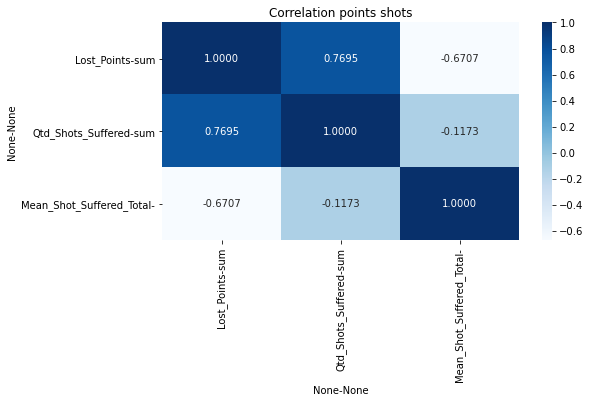

In [42]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_points_shots_means.corr(method = 'pearson'),
            annot = True,
            fmt = '.4f',
            cmap='Blues')
plt.title('Correlation points shots')
plt.show()

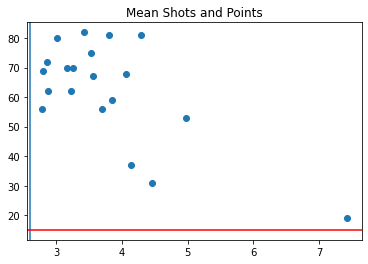

In [51]:
plt.scatter(df_points_shots_means['Mean_Shot_Suffered_Total'], df_points_shots_means['Lost_Points'])
plt.title('Mean Shots and Points')
plt.axvline(2.6)
plt.axhline(15, color='red')
plt.show()

In [52]:
print(stats.spearmanr(df_points_shots_means['Mean_Shot_Suffered_Total'], df_points_shots_means[('Lost_Points', 'sum')]))
print(stats.kendalltau( df_points_shots_means['Mean_Shot_Suffered_Total'], df_points_shots_means[('Lost_Points', 'sum')]))
print(stats.pearsonr( df_points_shots_means['Mean_Shot_Suffered_Total'], df_points_shots_means[('Lost_Points', 'sum')] ))

SpearmanrResult(correlation=-0.37500042527108196, pvalue=0.10327896419688021)
KendalltauResult(correlation=-0.2553335978283431, pvalue=0.11861470877905213)
(-0.6706873495024298, 0.0012096727832667394)


> Não há um valor de correlação significante entre chutes sofridos e derrotas 

# Time que tem o melhor índice de aproveitamento gol/chute conquista mais pontos?

In [59]:
query04 = """

        SELECT HomeTeam as Team, 
               FTR, 
               count(FTR) as Qtd_per_Result, 
               sum(HS) as Qtd_Shots,
               sum(FTHG) as Qtd_Goals,
               "Home" as Local,
               CASE 
                  WHEN FTR = 'A' THEN 'Lost'
                  WHEN FTR = 'H' THEN 'Win'
                  ELSE 'Draw'
               END AS Result
        From Results_2005
        GROUP by Team, FTR
        UNION
        SELECT AwayTeam as Team, 
               FTR, 
               count(FTR) as Qtd_per_Result, 
               sum("AS") as Qtd_Shots,
               sum(FTAG) as Qtd_Goals,
               "Away" as Local, 
               CASE 
                 WHEN FTR = 'A' THEN 'Win'
                 WHEN FTR = 'H' THEN 'Lost'
                 ELSE 'Draw'
               END AS Result
        From Results_2005
        GROUP by Team, FTR
        order by Team, Result, Local

"""

df_lever_shots = pd.read_sql_query(query04, db_PremierLeague)
df_lever_shots


,Team,FTR,Qtd_per_Result,Qtd_Shots,Qtd_Goals,Local,Result
0,Arsenal,D,3,42,2,Away,Draw
1,Arsenal,D,5,59,8,Home,Draw
2,Arsenal,H,4,37,2,Away,Lost
3,Arsenal,A,1,11,2,Home,Lost
4,Arsenal,A,12,144,29,Away,Win
...,...,...,...,...,...,...,...
113,West Brom,D,8,73,6,Home,Draw
114,West Brom,H,10,104,6,Away,Lost
115,West Brom,A,6,47,2,Home,Lost
116,West Brom,A,1,14,4,Away,Win


In [120]:
import math
# df_lever_shots['Index_Goals_Shots'].loc[math.isinf(df_lever_shots['Index_Goals_Shots'])]

In [121]:
# df_lever_shots['Index_Goals_Shots'] = (df_lever_shots['Qtd_Shots']/df_lever_shots['Qtd_Goals'])
df_lever_shots['Index_Goals_Shots'] = (df_lever_shots['Qtd_Goals']/df_lever_shots['Qtd_Shots'])
# df_lever_shots['Index_Goals_Shots'].loc[math.isinf(df_lever_shots['Index_Goals_Shots']=='Inf')] = 0
df_lever_shots.sort_values(by=['Index_Goals_Shots'], ascending=False)

,Team,FTR,Qtd_per_Result,Qtd_Shots,Qtd_Goals,Local,Result,Index_Goals_Shots,Points
10,Aston Villa,A,4,35,10,Away,Win,0.285714,12
116,West Brom,A,1,14,4,Away,Win,0.285714,3
16,Birmingham,A,3,21,6,Away,Win,0.285714,9
45,Crystal Palace,A,1,4,1,Away,Win,0.250000,3
104,Southampton,A,1,12,3,Away,Win,0.250000,3
...,...,...,...,...,...,...,...,...,...
108,Tottenham,H,9,87,1,Away,Lost,0.011494,0
68,Man City,A,5,49,0,Home,Lost,0.000000,0
73,Man United,H,4,63,0,Away,Lost,0.000000,0
38,Chelsea,H,1,9,0,Away,Lost,0.000000,0


In [67]:
df_lever_shots['Points'] = 0
df_lever_shots['Points'].loc[df_lever_shots['Result']=='Draw'] = (1 * df_lever_shots['Qtd_per_Result'])
df_lever_shots['Points'].loc[df_lever_shots['Result']=='Lost'] = (0 * df_lever_shots['Qtd_per_Result'])
df_lever_shots['Points'].loc[df_lever_shots['Result']=='Win'] = (3 * df_lever_shots['Qtd_per_Result'])

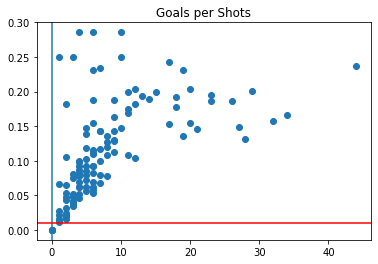

In [124]:
plt.scatter(df_lever_shots['Qtd_Goals'], df_lever_shots['Index_Goals_Shots'])
plt.title('Goals per Shots')
plt.axvline(0.02)
plt.axhline(0.01, color='red')
plt.show()

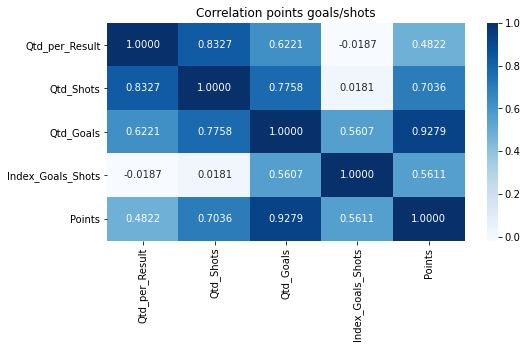

In [125]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_lever_shots.corr(method = 'pearson'),
            annot = True,
            fmt = '.4f',
            cmap='Blues')
plt.title('Correlation points goals/shots')
plt.show()

In [129]:
print(stats.spearmanr(df_lever_shots['Index_Goals_Shots'], df_lever_shots['Qtd_Goals']))
print(stats.kendalltau( df_lever_shots['Index_Goals_Shots'], df_lever_shots['Qtd_Goals']))
print(stats.pearsonr(df_lever_shots['Index_Goals_Shots'], df_lever_shots['Qtd_Goals']))

SpearmanrResult(correlation=0.7450100283166795, pvalue=3.947568414977189e-22)
KendalltauResult(correlation=0.6025828757723497, pvalue=5.590174504962154e-21)
(0.560726812220745, 4.017033010857295e-11)


In [128]:
print(stats.spearmanr(df_lever_shots['Index_Goals_Shots'], df_lever_shots['Points']))
print(stats.kendalltau( df_lever_shots['Index_Goals_Shots'], df_lever_shots['Points']))
print(stats.pearsonr(df_lever_shots['Index_Goals_Shots'], df_lever_shots['Points']))

SpearmanrResult(correlation=0.6743389207849474, pvalue=5.740159066417551e-17)
KendalltauResult(correlation=0.49312884959586145, pvalue=7.160825451521645e-14)
(0.5611091313584213, 3.871336673996717e-11)


> Há correlação significativa estatisticamente indicando que o índice de alto aproveitamento chute/gols pode levar ao time ter mais gols ou mais pontos conquistados

# Time que resiste mais a finalização gol sofrido/chute sofrido, perde menos?

In [131]:
query05 = """

    SELECT HomeTeam as Team, 
           FTR, 
           count(FTR) as Qtd_per_Result, 
           sum("AS") as Qtd_Shots_Suffered,
           sum(FTAG) as Qtd_Goals_Suffered,
           "Home" as Local,
           CASE 
              WHEN FTR = 'A' THEN 'Lost'
              WHEN FTR = 'H' THEN 'Win'
              ELSE 'Draw'
           END AS Result
    From Results_2005
    GROUP by Team, FTR
    UNION
    SELECT AwayTeam as Team, 
           FTR, 
           count(FTR) as Qtd_per_Result, 
           sum(HS) as Qtd_Shots_Suffered,
           sum(FTHG) as Qtd_Goals_Suffered,
           "Away" as Local, 
           CASE 
             WHEN FTR = 'A' THEN 'Win'
             WHEN FTR = 'H' THEN 'Lost'
             ELSE 'Draw'
           END AS Result
    From Results_2005
    GROUP by Team, FTR
    order by Team, Result, Local

"""

df_index_gols_suffered = pd.read_sql_query(query05, db_PremierLeague)
df_index_gols_suffered.sample(5)

,Team,FTR,Qtd_per_Result,Qtd_Shots_Suffered,Qtd_Goals_Suffered,Local,Result
54,Fulham,D,4,42,3,Home,Draw
82,Middlesbrough,H,9,87,4,Home,Win
2,Arsenal,H,4,40,7,Away,Lost
45,Crystal Palace,A,1,16,0,Away,Win
14,Birmingham,H,10,98,21,Away,Lost


In [132]:
df_index_gols_suffered['Lost_Points'] = 0
df_index_gols_suffered['Lost_Points'].loc[df_index_gols_suffered['Result']=='Draw'] = (2 * df_index_gols_suffered['Qtd_per_Result'])
df_index_gols_suffered['Lost_Points'].loc[df_index_gols_suffered['Result']=='Lost'] = (3 * df_index_gols_suffered['Qtd_per_Result'])
df_index_gols_suffered['Lost_Points'].loc[df_index_gols_suffered['Result']=='Win'] = (0 * df_index_gols_suffered['Qtd_per_Result'])

In [133]:
df_index_gols_suffered['Index_Goals_Shot'] = 0
df_index_gols_suffered['Index_Goals_Shot'].loc[df_index_gols_suffered['Qtd_Goals_Suffered']==0] = 0
df_index_gols_suffered['Index_Goals_Shot'].loc[df_index_gols_suffered['Qtd_Goals_Suffered']!=0] = df_index_gols_suffered['Qtd_Shots_Suffered']/df_index_gols_suffered['Qtd_Goals_Suffered']

In [135]:
df_index_gols_suffered.sample(5)

,Team,FTR,Qtd_per_Result,Qtd_Shots_Suffered,Qtd_Goals_Suffered,Local,Result,Lost_Points,Index_Goals_Shot
23,Blackburn,H,5,37,0,Home,Win,0,0.000000
102,Southampton,H,13,217,30,Away,Lost,39,7.233333
96,Portsmouth,H,12,159,28,Away,Lost,36,5.678571
25,Bolton,D,5,39,5,Home,Draw,10,7.800000
8,Aston Villa,H,10,136,26,Away,Lost,30,5.230769


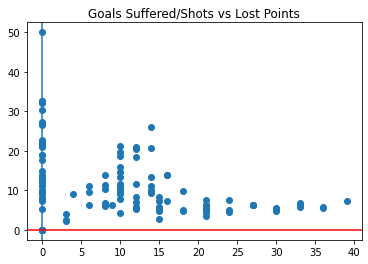

In [142]:
plt.scatter(df_index_gols_suffered['Lost_Points'], df_index_gols_suffered['Index_Goals_Shot'])
plt.title('Goals Suffered/Shots vs Lost Points')
plt.axvline(0)
plt.axhline(0.0, color='red')
plt.show()

In [155]:
# média chutes e goals sofridos com pontuação negativa com resposta
df_points_shots_means = df_index_gols_suffered.\
groupby(['Team']).\
agg({'Lost_Points': ['sum'], 'Qtd_Shots_Suffered': ['sum'], 'Qtd_Goals_Suffered': ['sum'] }).\
sort_values([('Lost_Points', 'sum')], ascending=False)

df_points_shots_means['Shot_Goals_Index'] =  df_points_shots_means[('Qtd_Shots_Suffered', 'sum')] / df_points_shots_means[('Lost_Points', 'sum')]
df_points_shots_means

,Lost_Points,Qtd_Shots_Suffered,Qtd_Goals_Suffered,Shot_Goals_Index
,sum,sum,sum,
Team,,,,
Southampton,82,533,66,6.500000
Crystal Palace,81,532,62,6.567901
Norwich,81,614,77,7.580247
West Brom,80,498,61,6.225000
Portsmouth,75,509,59,6.786667
Blackburn,72,392,43,5.444444
Newcastle,70,411,57,5.871429
Fulham,70,433,60,6.185714


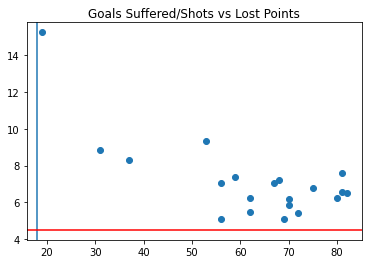

In [156]:
plt.scatter(df_points_shots_means[('Lost_Points', 'sum')], df_points_shots_means['Shot_Goals_Index'])
plt.title('Goals Suffered/Shots vs Lost Points')
plt.axvline(18)
plt.axhline(4.5, color='red')
plt.show()

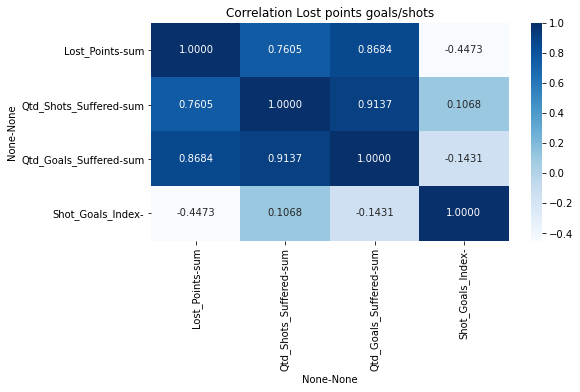

In [157]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_points_shots_means.corr(method = 'spearman'),
            annot = True,
            fmt = '.4f',
            cmap='Blues')
plt.title('Correlation Lost points goals/shots')
plt.show()

In [153]:
print(stats.spearmanr(df_points_shots_means[('Lost_Points', 'sum')], df_points_shots_means['Shot_Goals_Means']))
print(stats.kendalltau(df_points_shots_means[('Lost_Points', 'sum')], df_points_shots_means['Shot_Goals_Means']))
print(stats.pearsonr(df_points_shots_means[('Lost_Points', 'sum')], df_points_shots_means['Shot_Goals_Means']))

SpearmanrResult(correlation=-0.4472896638775556, pvalue=0.047994936152118924)
KendalltauResult(correlation=-0.3085280973759146, pvalue=0.05932964153966497)
(-0.7260080552897268, 0.0002900933847949216)


> Há correlação inversa entre perda de pontos / levar mais gols com a capacidade de resistir a goals (chutes sem levar gols)

# qtd de zebras vs resultado previstos rodadas? Quem lucra mais?

In [7]:
query06 = """

SELECT HomeTeam, AwayTeam, FTHG, FTAG, FTR, B365H, B365D, B365A,
       CASE 
		 WHEN FTR = 'A' THEN B365A
		 WHEN FTR = 'H' THEN B365H
		 ELSE B365D
      END AS Gain,
	  CASE 
		 WHEN FTR = 'A' AND B365A<B365H AND B365A<B365D THEN "Waited"
		 WHEN FTR = 'H' AND B365H<B365A AND B365H<B365D THEN "Waited"
		 WHEN FTR = 'D' AND B365D<B365A AND B365D<B365H THEN "Waited"
		 ELSE "Zebra"
      END AS Result_Eval
FROM Results_2005

"""

df_waited_zebra = pd.read_sql_query(query06, db_PremierLeague)
df_waited_zebra.head(10) # 1ª rodada

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,Gain,Result_Eval
0,Aston Villa,Southampton,2,0,H,1.90,3.10,4.33,1.90,Waited
1,Blackburn,West Brom,1,1,D,1.80,3.10,5.00,3.10,Zebra
2,Bolton,Charlton,4,1,H,2.25,3.20,3.10,2.25,Waited
3,Man City,Fulham,1,1,D,2.10,3.25,3.40,3.25,Zebra
4,Middlesbrough,Newcastle,2,2,D,2.30,3.25,3.00,3.25,Zebra
5,Norwich,Crystal Palace,1,1,D,2.10,3.25,3.40,3.25,Zebra
6,Portsmouth,Birmingham,1,1,D,2.40,3.20,2.87,3.20,Zebra
7,Tottenham,Liverpool,1,1,D,3.10,3.20,2.25,3.20,Zebra
8,Chelsea,Man United,1,0,H,2.10,3.25,3.40,2.10,Waited
9,Everton,Arsenal,1,4,A,6.00,3.40,1.61,1.61,Waited


In [9]:
df_waited_zebra.groupby(['Result_Eval']).\
agg({'Result_Eval': ['count'], 'Gain': ['mean']})

,Result_Eval,Gain
,count,mean
Result_Eval,,
Waited,193,1.835249
Zebra,187,3.542904


In [20]:
df_waited_zebra.shape

(380, 10)

In [40]:
# por rodada se o apostador acertar somente as zebras ou somente os esperados
n = 0
i = 1
round_results = []
round_values = []
while n < 380:
    print('Round {}:'.format(i))
    df = df_waited_zebra.loc[n : n+9]
    df = df.groupby(['Result_Eval']).agg({'Result_Eval': ['count'], 'Gain': ['mean']})
    df['Mean_Gain'] = df[('Result_Eval','count')] * df[('Gain','mean')]
    print(df)
    if df[('Mean_Gain')][0]>df[('Mean_Gain')][1]:
        print("Waited melhor ganho {:.2f}".format(df[('Mean_Gain')][0]))
        round_results.append('Waited')
        round_values.append(df[('Mean_Gain')][0])
    else:
        print("Zebra melhor ganho {:.2f}".format(df[('Mean_Gain')][1]))
        round_results.append('Zebra') 
        round_values.append(df[('Mean_Gain')][1])
    n = n + 10
    i = i + 1
    print('\n')

Round 1:
            Result_Eval      Gain Mean_Gain
                  count      mean          
Result_Eval                                
Waited                4  1.965000      7.86
Zebra                 6  3.208333     19.25
Zebra melhor ganho 19.25


Round 2:
            Result_Eval      Gain Mean_Gain
                  count      mean          
Result_Eval                                
Waited                7  1.794286     12.56
Zebra                 3  3.900000     11.70
Waited melhor ganho 12.56


Round 3:
            Result_Eval   Gain Mean_Gain
                  count   mean          
Result_Eval                             
Waited                5  1.904      9.52
Zebra                 5  3.290     16.45
Zebra melhor ganho 16.45


Round 4:
            Result_Eval      Gain Mean_Gain
                  count      mean          
Result_Eval                                
Waited                7  1.804286     12.63
Zebra                 3  3.766667     11.30
Waited melhor gan

Zebra melhor ganho 15.00


Round 38:
            Result_Eval      Gain Mean_Gain
                  count      mean          
Result_Eval                                
Waited                3  1.710000      5.13
Zebra                 7  3.167143     22.17
Zebra melhor ganho 22.17




In [46]:
print("Quantidade rodadas Waited potencial de > ganho {}".format(round_results.count('Waited')))
print("Quantidade rodadas Zebra potencial de > ganho {}".format(round_results.count('Zebra')))

Quantidade rodadas Waited potencial de > ganho 8
Quantidade rodadas Zebra potencial de > ganho 30


> Resultado esperado deve acontecer no mínimo 7 a favor pra compensar o zebra e enquanto zebra a partir de 3, 
já pode ultrapassar o esperado 

# time que teve mais cartão amarelo levou menos gol?

In [120]:
query07 = """

    SELECT HomeTeam as Team, 
           FTR, 
           count(FTR) as Qtd_per_Result, 
           sum(HF) as Qtd_Faults,
           sum(HY) as Qtd_Yellows,
           sum(HR) as Qtd_Reds,
           "Home" as Local,
           CASE 
              WHEN FTR = 'A' THEN 'Lost'
              WHEN FTR = 'H' THEN 'Win'
              ELSE 'Draw'
           END AS Result
    From Results_2005
    GROUP by Team, FTR
    UNION
    SELECT AwayTeam as Team, 
           FTR, 
           count(FTR) as Qtd_per_Result, 
           sum(AF) as Qtd_Faults,
           sum(AY) as Qtd_Yellows,
           sum(AR) as Qtd_Reds,
           "Away" as Local, 
           CASE 
             WHEN FTR = 'A' THEN 'Win'
             WHEN FTR = 'H' THEN 'Lost'
             ELSE 'Draw'
           END AS Result
    From Results_2005
    GROUP by Team, FTR
    order by Team, Result, Local

"""

df_faults_cards = pd.read_sql(query07, db_PremierLeague)
df_faults_cards.shape

(118, 8)

In [63]:
df_faults_cards['Result_Number'] = 0
df_faults_cards['Result_Number'].loc[df_faults_cards['Result']=='Draw'] = 0
df_faults_cards['Result_Number'].loc[df_faults_cards['Result']=='Lost'] = 1
df_faults_cards['Result_Number'].loc[df_faults_cards['Result']=='Win'] = 2

In [126]:
# total cartões (amarelo e vermelho) e total faltas
df_faults_cards_total = df_faults_cards.\
groupby(['Team', 'Result']).\
agg({'Qtd_per_Result': ['sum'], 'Qtd_Faults': ['sum'], 'Qtd_Yellows':[sum], 'Qtd_Reds': [sum]})

# média por jogo cartões (amarelo e vermelho) e total faltas
df_faults_cards_total['Faults_Mean'] = df_faults_cards_total[('Qtd_Faults','sum')]/df_faults_cards_total[('Qtd_per_Result','sum')]
df_faults_cards_total['Yellow_Mean'] = df_faults_cards_total[('Qtd_Yellows','sum')]/df_faults_cards_total[('Qtd_per_Result','sum')]
df_faults_cards_total['Red_Mean'] = df_faults_cards_total[('Qtd_Reds','sum')]/df_faults_cards_total[('Qtd_per_Result','sum')]

df_faults_cards_total[('Result','Num')] = 0
i = 0
while i <= 58:
    df_faults_cards_total[('Result','Num')][i] = 0
    df_faults_cards_total[('Result','Num')][i+1]=1
    df_faults_cards_total[('Result','Num')][i+2]=2
    i = i + 3

df_faults_cards_total[('Points','Num')] = 0
df_faults_cards_total[('Points','Num')].loc[df_faults_cards_total[('Result','Num')]==0] = (1 * df_faults_cards_total[('Qtd_per_Result','sum')])
df_faults_cards_total[('Points','Num')].loc[df_faults_cards_total[('Result','Num')]==1] = (0 * df_faults_cards_total[('Qtd_per_Result','sum')])
df_faults_cards_total[('Points','Num')].loc[df_faults_cards_total[('Result','Num')]==2] = (3 * df_faults_cards_total[('Qtd_per_Result','sum')])
    
    
df_faults_cards_total


Qtd_per_Result Qtd_Faults Qtd_Yellows Qtd_Reds  \
                                 sum        sum         sum      sum   
Team           Result                                                  
Arsenal        Draw                8         88          11        1   
               Lost                5         75           8        0   
               Win                25        281          27        0   
Aston Villa    Draw               11        152          13        1   
               Lost               15        233          31        1   
               Win                12        195          12        0   
Birmingham     Draw               12        165          22        1   
               Lost               15        190          26        2   
               Win                11        173          15        0   
Blackburn      Draw               15        248          26        3   
               Lost               14        210          27        2   
               Win                 9        135          20        0   
Bolton         Draw               10        138          16        1   
               Lost               12        188          18        0   
               Win                16        214          23        1   
Charlton       Draw               10        123          13        0   
               Lost               16        187          15        2   
               Win                12        150          10        1   
Chelsea        Draw                8        116          15        0   
               Lost                1          7           2        0   
               Win                29        351          36        0   
Crystal Palace Draw               12        171          21        3   
               Lost               19        261          25        0   
               Win                 7         94          11        0   
Everton        Draw                7        102          14        0   
               Lost               13        184          21        2   
               Win                18        230          20        2   
Fulham         Draw                8         91          15        2   
               Lost               18        227          25        3   
               Win                12        171          17        2   
Liverpool      Draw                7         65           5        0   
               Lost               14        191          27        0   
               Win                17        184          12        2   
Man City       Draw               13        162          13        1   
               Lost               12        165          21        2   
               Win                13        152          10        0   
Man United     Draw               11        131          15        1   
               Lost                5         63           8        2   
               Win                22        277          26        2   
Middlesbrough  Draw               13        167          23        0   
               Lost               11        125          14        1   
               Win                14        182          16        1   
Newcastle      Draw               14        185          22        0   
               Lost               14        189          19        5   
               Win                10        115          17        0   
Norwich        Draw               12        158          10        1   
               Lost               19        259          18        1   
               Win                 7        106           6        0   
Portsmouth     Draw                9        101          20        0   
               Lost               19        221          27        2   
               Win                10        134           7        0   
Southampton    Draw               14        178          16        2   
               Lost               18        234          21   

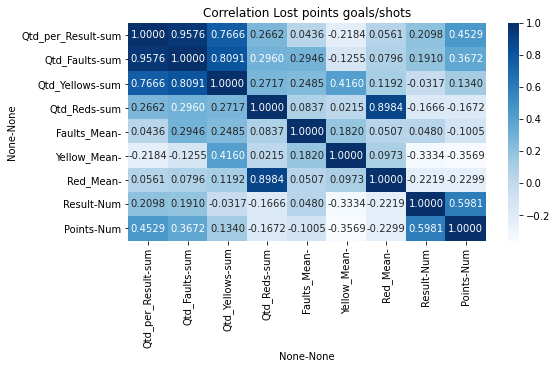

In [127]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_faults_cards_total.corr(method = 'pearson'),
            annot = True,
            fmt = '.4f',
            cmap='Blues')
plt.title('Correlation Lost points goals/shots')
plt.show()

In [128]:
# Faltas influencia no resultado?
print('Faltas vs Resultados')
print(stats.pearsonr(df_faults_cards_total[('Qtd_Faults', 'sum')], df_faults_cards_total[('Result','Num')]))
print(stats.pearsonr(df_faults_cards_total[('Faults_Mean', '')], df_faults_cards_total[('Result','Num')]))
print('------------------------------------')
print('Faltas vs Pontos')
print(stats.pearsonr(df_faults_cards_total[('Qtd_Faults', 'sum')], df_faults_cards_total[('Points','Num')]))
print(stats.pearsonr(df_faults_cards_total[('Faults_Mean', '')], df_faults_cards_total[('Points','Num')]))

Faltas vs Resultados
(0.19100157897937786, 0.14377805347550895)
(0.048011467944650554, 0.7156472644876176)
------------------------------------
Faltas vs Pontos
(0.3672024612351781, 0.003900898639060438)
(-0.10050795745499849, 0.4448124597058404)


In [129]:
# cartões amarelos influencia no resultado?
print('Cartões amarelos  vs Resultados')
print(stats.pearsonr(df_faults_cards_total[('Qtd_Yellows', 'sum')], df_faults_cards_total[('Result','Num')]))
print(stats.pearsonr(df_faults_cards_total[('Yellow_Mean', '')], df_faults_cards_total[('Result','Num')]))
print('------------------------------------')
print('Cartões amarelos vs Pontos')
print(stats.pearsonr(df_faults_cards_total[('Qtd_Yellows', 'sum')], df_faults_cards_total[('Points','Num')]))
print(stats.pearsonr(df_faults_cards_total[('Yellow_Mean', '')], df_faults_cards_total[('Points','Num')]))

Cartões amarelos  vs Resultados
(-0.03173848764547496, 0.8097610702653738)
(-0.3334324407579949, 0.009230716379533968)
------------------------------------
Cartões amarelos vs Pontos
(0.13397328544282966, 0.30747614902362186)
(-0.35687438871063865, 0.005126186949796088)


In [130]:
# cartões vermelhos influencia no resultado?
print('Cartões vermelhos vs Resultados')
print(stats.pearsonr(df_faults_cards_total[('Qtd_Reds', 'sum')], df_faults_cards_total[('Result','Num')]))
print(stats.pearsonr(df_faults_cards_total[('Red_Mean', '')], df_faults_cards_total[('Result','Num')]))
print('------------------------------------')
print('Cartões vermelhos vs Pontos')
print(stats.pearsonr(df_faults_cards_total[('Qtd_Reds', 'sum')], df_faults_cards_total[('Points','Num')]))
print(stats.pearsonr(df_faults_cards_total[('Red_Mean', '')], df_faults_cards_total[('Points','Num')]))

Cartões vermelhos vs Resultados
(-0.1665714883900069, 0.20336477257072744)
(-0.22190440509937837, 0.08837684230265891)
------------------------------------
Cartões vermelhos vs Pontos
(-0.1672223336966565, 0.2015793756175252)
(-0.22989006141757423, 0.07722625921083988)


> número de faltas tem pouco influência estatística no resultado, porém a média de faltas pode influenciar no alcance dos pontos
> já média de cartões amarelos tem influência inversa no resultado e nos pontos, contribui pra derrota
> já cartão vermelho não mostrou significado estatístico